# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [12]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    z = z - 0.5
    x = (z**2).sum()**0.5
    n = np.random.randn(*x.shape)*sigma    
    return np.array([x + n])

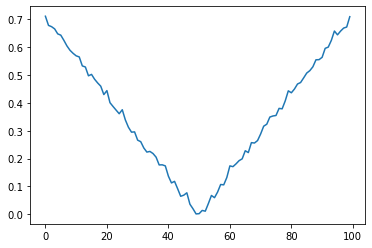

In [4]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0) for z0 in z]
plt.plot(x)

In [6]:
z0 = np.ones(2)*0.7
x0 = model(z0, sigma = 1e-6)
x0

array([0.2828432])

In [7]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE)

In [8]:
sw.run(nrounds = 1, max_epochs = 10, recycle_net = False, threshold = 1e-4, nsamples = 10000)

Start training


(0.0, 1.0)

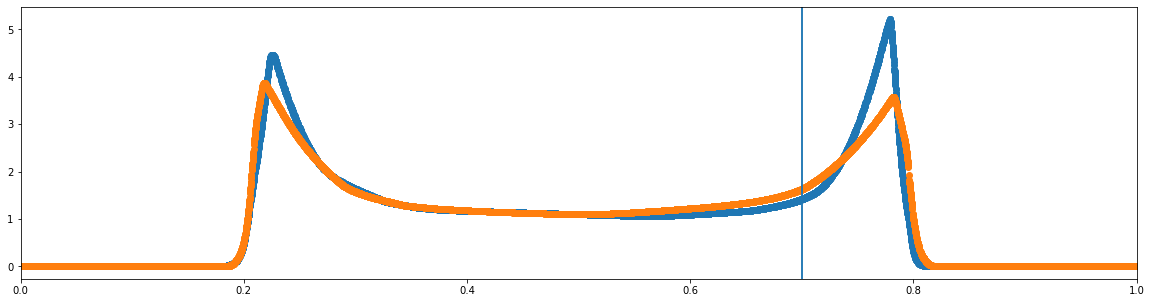

In [11]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p  = sw.posterior(i, version = -1)
    plt.axvline(z0[i])
    plt.scatter(z, p)
plt.xlim([0, 1])

In [13]:
sw.comb([[0, 1]], max_epochs = 1)

Start training


(0.0, 1.0)

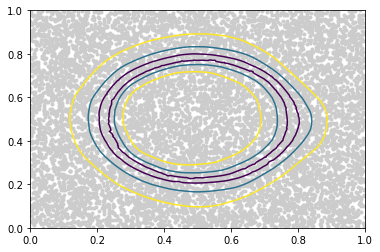

In [14]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])
plt.xlim([0, 1])
plt.ylim([0, 1])